In [15]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Style
sns.set(context="notebook", style="whitegrid", palette="colorblind")
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# Dataset from provided values
df = pd.DataFrame({
    'Miles Traveled': [89, 66, 78, 111, 44, 77, 80, 66, 109, 76],
    'Number of Deliveries': [4, 1, 3, 6, 1, 3, 3, 2, 5, 3],
    'Gas Price': [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25],
    'Travel Time': [7.0, 5.4, 6.6, 7.4, 4.8, 6.4, 7.0, 5.6, 7.3, 6.4]
})
df

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
0,89,4,3.840,7.000
1,66,1,3.190,5.400
2,78,3,3.780,6.600
3,111,6,3.890,7.400
4,44,1,3.570,4.800
5,77,3,3.570,6.400
6,80,3,3.030,7.000
7,66,2,3.510,5.600
8,109,5,3.540,7.300
9,76,3,3.250,6.400


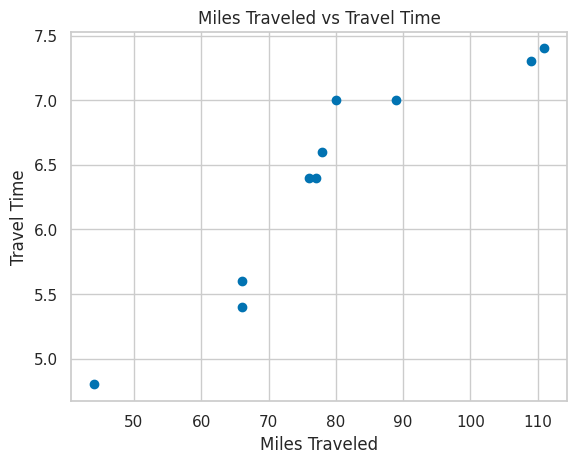

In [16]:
plt.scatter(df["Miles Traveled"], df["Travel Time"])
plt.xlabel("Miles Traveled")
plt.ylabel("Travel Time")
plt.title("Miles Traveled vs Travel Time")
plt.show()

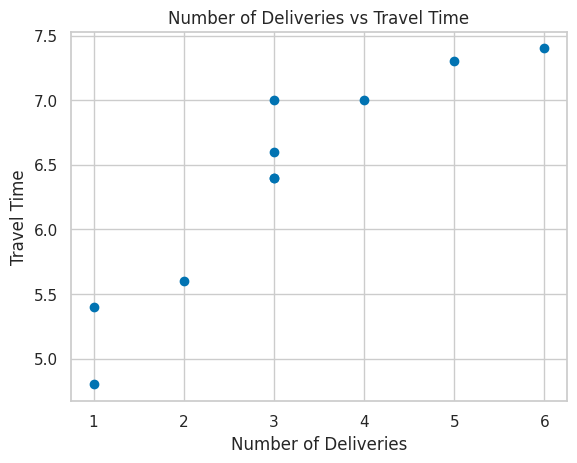

In [17]:
plt.scatter(df["Number of Deliveries"], df["Travel Time"])
plt.xlabel("Number of Deliveries")
plt.ylabel("Travel Time")
plt.title("Number of Deliveries vs Travel Time")
plt.show()

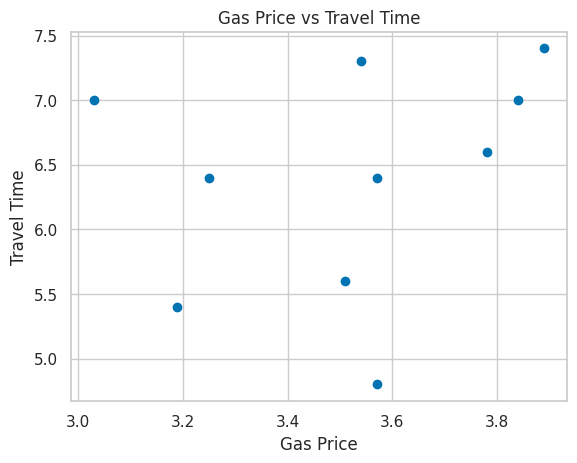

In [18]:
plt.scatter(df["Gas Price"], df["Travel Time"])
plt.xlabel("Gas Price")
plt.ylabel("Travel Time")
plt.title("Gas Price vs Travel Time")
plt.show()

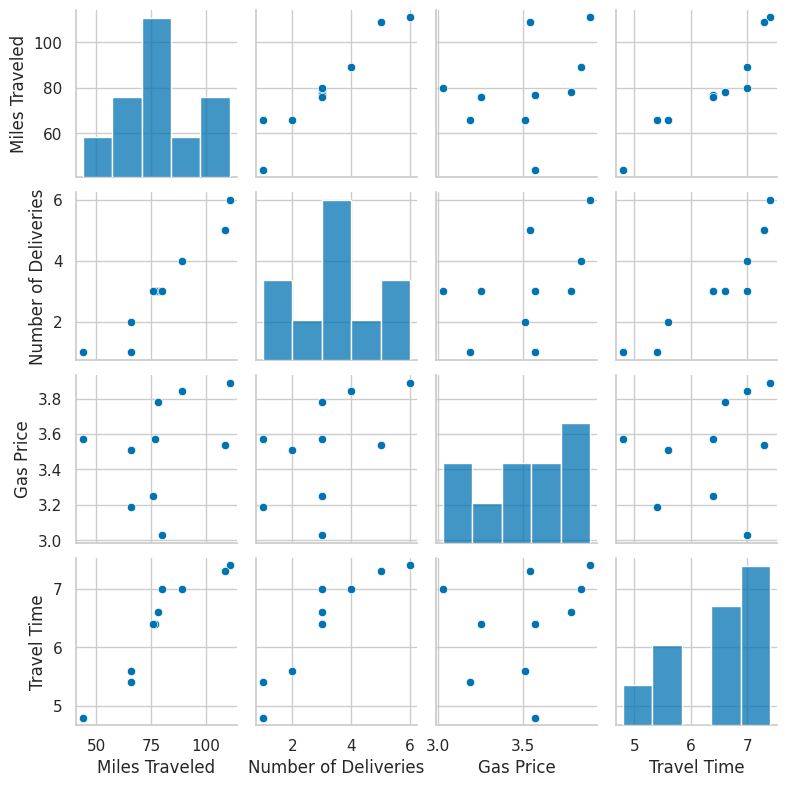

In [19]:
sns.pairplot(data=df, height=2)
plt.show()

In [20]:
r, p = pearsonr(df['Miles Traveled'], df['Travel Time'])
print(f"r = {r:.3f}, p-value = {p:.3f}")

r = 0.928, p-value = 0.000


In [21]:
r, p = pearsonr(df['Number of Deliveries'], df['Travel Time'])
print(f"r = {r:.3f}, p-value = {p:.3f}")

r = 0.916, p-value = 0.000


In [22]:
r, p = pearsonr(df['Gas Price'], df['Travel Time'])
print(f"r = {r:.3f}, p-value = {p:.3f}")

r = 0.267, p-value = 0.455


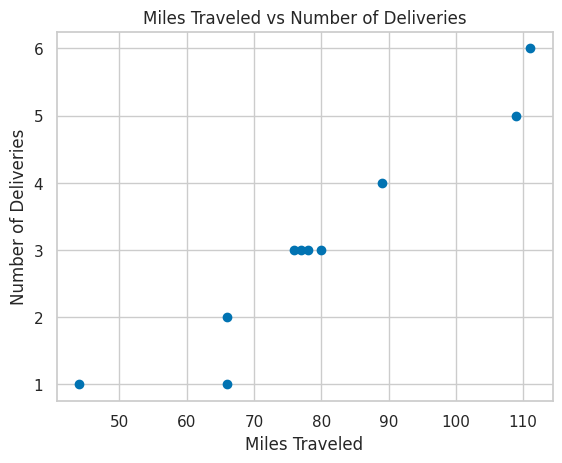

In [23]:
plt.scatter(df["Miles Traveled"], df["Number of Deliveries"])
plt.xlabel("Miles Traveled")
plt.ylabel("Number of Deliveries")
plt.title("Miles Traveled vs Number of Deliveries")
plt.show()

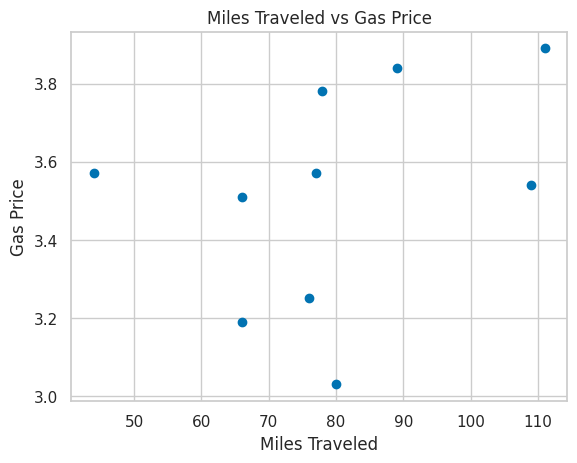

In [24]:
plt.scatter(df["Miles Traveled"], df["Gas Price"])
plt.xlabel("Miles Traveled")
plt.ylabel("Gas Price")
plt.title("Miles Traveled vs Gas Price")
plt.show()

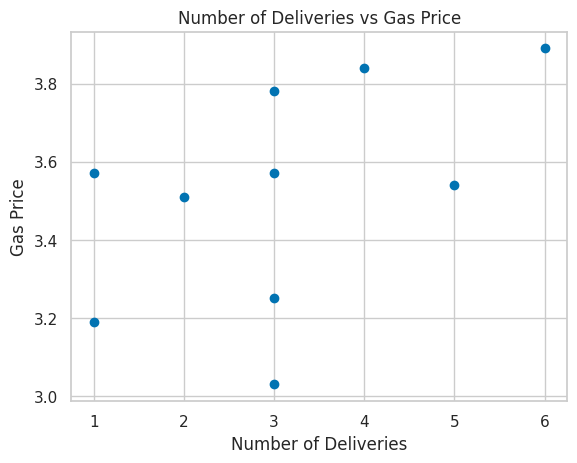

In [25]:
plt.scatter(df["Number of Deliveries"], df["Gas Price"])
plt.xlabel("Number of Deliveries")
plt.ylabel("Gas Price")
plt.title("Number of Deliveries vs Gas Price")
plt.show()

In [26]:
r, p = pearsonr(df['Miles Traveled'], df['Number of Deliveries'])
print(f"r = {r:.3f}, p-value = {p:.3f}")

r = 0.956, p-value = 0.000


In [27]:
r, p = pearsonr(df['Miles Traveled'], df['Gas Price'])
print(f"r = {r:.3f}, p-value = {p:.3f}")

r = 0.356, p-value = 0.313


In [28]:
r, p = pearsonr(df['Number of Deliveries'], df['Gas Price'])
print(f"r = {r:.3f}, p-value = {p:.3f}")

r = 0.498, p-value = 0.143


In [29]:
df.corr()

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
Miles Traveled,1.000,0.956,0.356,0.928
Number of Deliveries,0.956,1.000,0.498,0.916
Gas Price,0.356,0.498,1.000,0.267
Travel Time,0.928,0.916,0.267,1.000


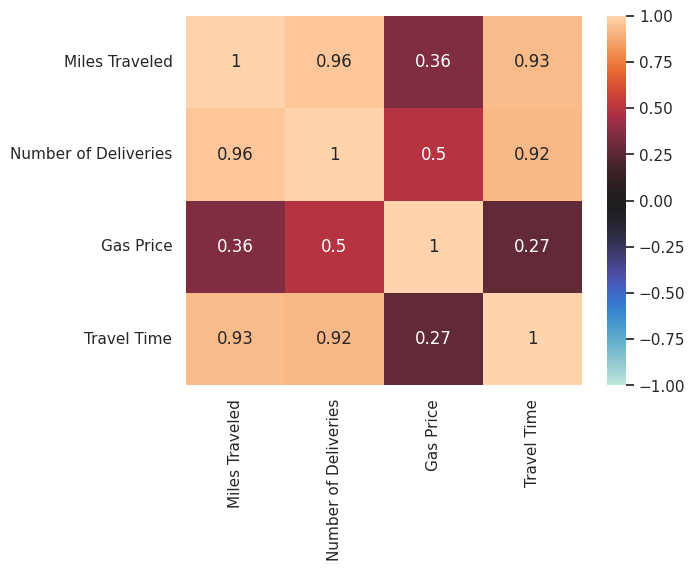

In [30]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [37]:
# Set independent and dependent variables
X = df[['Miles Traveled']]
y = df['Travel Time']
X_sm = sm.add_constant(X)

print("Independent variables (X):")
display(X_sm.head())

print("\nDependent variable (y):")
display(y.head())

Independent variables (X):


,const,Miles Traveled
0,1.000,89
1,1.000,66
2,1.000,78
3,1.000,111
4,1.000,44



Dependent variable (y):


,Travel Time
0,7.000
1,5.400
2,6.600
3,7.400
4,4.800


In [38]:
#  Build and train the model
model = sm.OLS(y, X_sm).fit()
print("Model fitted successfully.")
print(f"Number of observations: {int(model.nobs)}")

Model fitted successfully.
Number of observations: 10


In [35]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           0.000107
Time:                        21:33:19   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1856      0.467      6.

In [36]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
print("R² Score:", r2_score(y, y_pred))

R² Score: 0.8615153295097224
